<a href="https://colab.research.google.com/github/karmesh825/cs666student/blob/main/CS666_Assignment_1_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

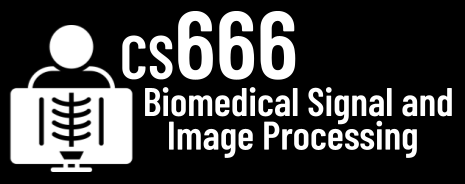

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.5 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [6]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [7]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

Text(0.5, 1.0, 'Original Signal using Biosppy')

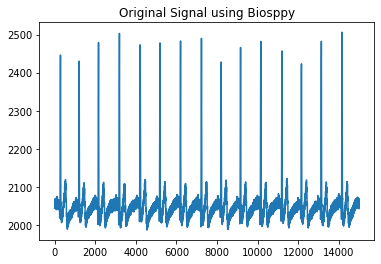

In [13]:
plt.plot(signal)
plt.title('Original Signal using Biosppy')


**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [5]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 1 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [9]:
### TODO
from biosppy.signals import ecg
out = ecg.ecg(signal= signal, sampling_rate=1000.0, show=False)
print(out)

ReturnTuple(ts=array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.4997e+01, 1.4998e+01,
       1.4999e+01]), filtered=array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748]), rpeaks=array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162]), templates_ts=array([-2.00000000e-01, -1.99000000e-01, -1.98000000e-01, -1.97000000e-01,
       -1.96000000e-01, -1.95000000e-01, -1.94000000e-01, -1.93000000e-01,
       -1.92000000e-01, -1.91000000e-01, -1.90000000e-01, -1.89000000e-01,
       -1.88000000e-01, -1.87000000e-01, -1.86000000e-01, -1.85000000e-01,
       -1.84000000e-01, -1.83000000e-01, -1.82000000e-01, -1.81000000e-01,
       -1.80000000e-01, -1.79000000e-01, -1.78000000e-01, -1.77000000e-01,
       -1.76000000e-01, -1.75000000e-01, -1.74000000e-01, -1.73000000e-01,
       -1.72000000e-01, -1.71000000e-01, -1.70000000e-01, -1.69000000e-01,
       -1.68000000e-01, -1.67000000e-01, -1

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

Text(0.5, 1.0, 'Ufiltered Signal for 3 Seconds')

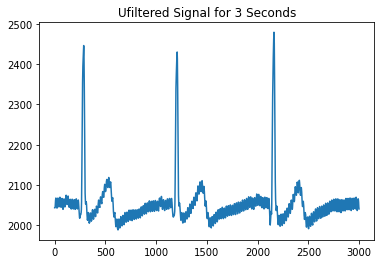

In [14]:
### TODO plot unfiltered signal

### Using the reference program from the discussions during lectures about previous homework

t_range_UF = 3
three_seconds_UF = signal[0:t_range_UF*SAMPLING_RATE]
plt.plot(three_seconds_UF)
plt.title('Ufiltered Signal for 3 Seconds')


Text(0.5, 1.0, 'Filtered Signal for 3 Seconds')

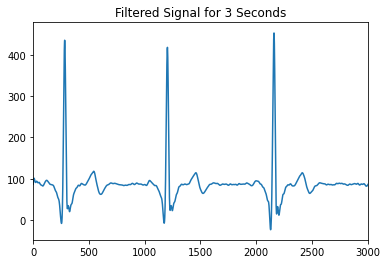

In [16]:
### TODO plot filtered signal

### Using the reference program from the discussions during lectures about previous homework

zero_sec = 0*SAMPLING_RATE
three_sec = 3*SAMPLING_RATE

plt.plot(out[1])
plt.xlim(zero_sec, three_sec)
plt.title('Filtered Signal for 3 Seconds')

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

Text(0.5, 0, 'time [s]')

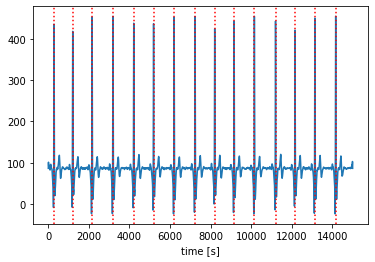

In [17]:
### TODO

### Referring to the axvline documentation and examples online
plt.plot(out[1])
[plt.axvline(rpks, color = 'r', ls=':') for rpks in out[2]]
plt.xlabel('time [s]')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [18]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

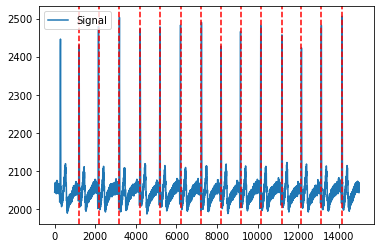

In [19]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method



_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)

plot = nk.events_plot(rpeaks['ECG_R_Peaks'],signal)

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")


In [20]:
waves_peak

{'ECG_P_Peaks': [1052,
  1991,
  3030,
  4051,
  5031,
  6030,
  7069,
  8031,
  8990,
  9989,
  11029,
  11990,
  12969,
  14007],
 'ECG_Q_Peaks': [1169,
  2124,
  3158,
  4180,
  5158,
  6163,
  7200,
  8164,
  9122,
  10121,
  11162,
  12123,
  13103,
  14133],
 'ECG_S_Peaks': [1262,
  2221,
  3241,
  4262,
  5259,
  6260,
  7300,
  8261,
  9219,
  10200,
  11259,
  12220,
  13199,
  14218],
 'ECG_T_Peaks': [1452,
  2410,
  3429,
  4453,
  5431,
  6449,
  7470,
  8451,
  9410,
  10409,
  11449,
  12409,
  13387,
  14409],
 'ECG_P_Onsets': [1035,
  1973,
  2992,
  4033,
  4993,
  6012,
  7051,
  8013,
  8972,
  9971,
  10869,
  11972,
  12951,
  13969],
 'ECG_T_Offsets': [1513,
  2472,
  3512,
  4533,
  5512,
  6511,
  7551,
  8511,
  9471,
  10470,
  11511,
  12471,
  13450,
  14469]}

In [21]:
# TODO Does the detection work well?

# Yes, the detection does work well using Neurokit and 
# is also versatile in its functionality and uses as compared to the Biosppy 
# Not only it detects a single type of peak but different types of peaks P,Q,R,S,T and all at once.
# The waves_peak gives us an idea about the P,Q,S,T offsets, onsets and peaks.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

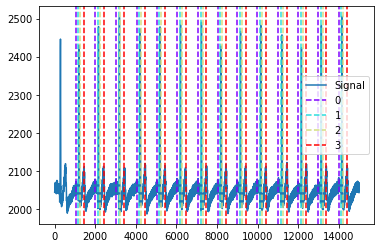

In [23]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

# Using the neurokit documentation for further usage and reference we use
# https://neuropsychology.github.io/NeuroKit/functions/ecg.html

# Delineate the ECG signal
# 0---> P 
# 1---> Q 
# 2---> S 
# 3---> T

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], signal[:15000])


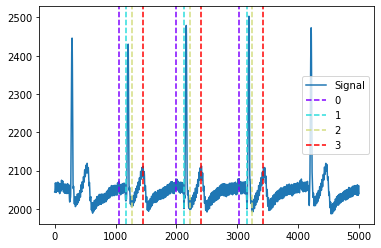

In [28]:
# TODO As above use the nk.ecg_delineate function to 
# detect peaks for 3 seconds of Unfiltered Signal(signal)

# 0---> P 
# 1---> Q 
# 2---> S 
# 3---> T

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3],
                       waves_peak['ECG_T_Peaks'][:3]], signal[:5000])

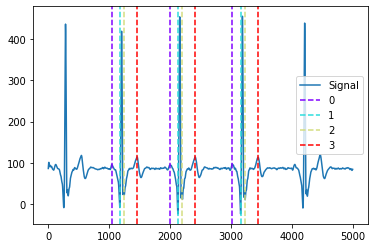

In [29]:
# TODO As above use the nk.ecg_delineate function to 
# detect peaks for 3 seconds of Filtered Signal(out)

_, waves_peak = nk.ecg_delineate(out[1], rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3],
                       waves_peak['ECG_T_Peaks'][:3]], out[1][:5000])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


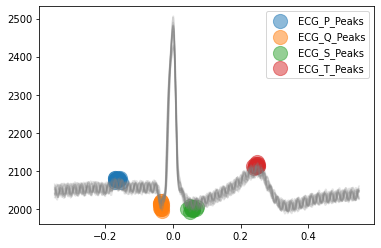

In [26]:
# Using the neurokit documentation for further usage and reference


# nk.ecg_delineate for Unfiltered Signal (signal)

_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


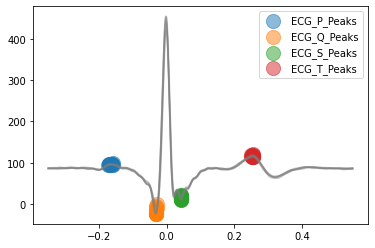

In [27]:
#

Text(0.5, 1.0, 'Filtered Signal processing for bandpass')

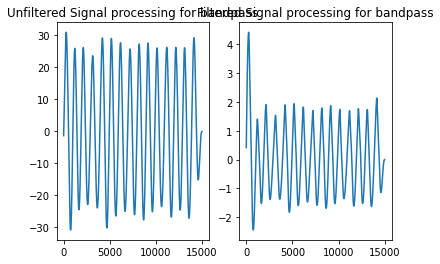

In [43]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.


cleaned = nk.signal_filter(signal, sampling_rate=1000, lowcut=0.5, highcut=1.5, method='butterworth', order=2, window_size='default', powerline=50, show=False)
cleaned_filt = nk.signal_filter(out[1], sampling_rate=1000, lowcut=0.5, highcut=1.5, method='butterworth', order=2, window_size='default', powerline=50, show=False)

plt.subplot(1,2,1)
plt.plot(cleaned)
plt.title('Unfiltered Signal processing for bandpass')

plt.subplot(1,2,2)
plt.plot(cleaned_filt)
plt.title('Filtered Signal processing for bandpass')




/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


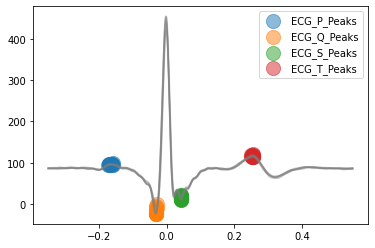

In [31]:
# Finally, run the delineation on the filtered signal from BioSPPY.

#nk.ecg_delineate for Filtered Signal (out)

_, waves_peak = nk.ecg_delineate(out[1], 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?

# NeuroKit works better as compared to Biosppy since 
# Neurokit2 has maneuverability over Biosppy and also is easier to use and 
# implement existing libraries right from 'peak detection' to 'unfiltered' and 'filtered' signal processing. 

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#